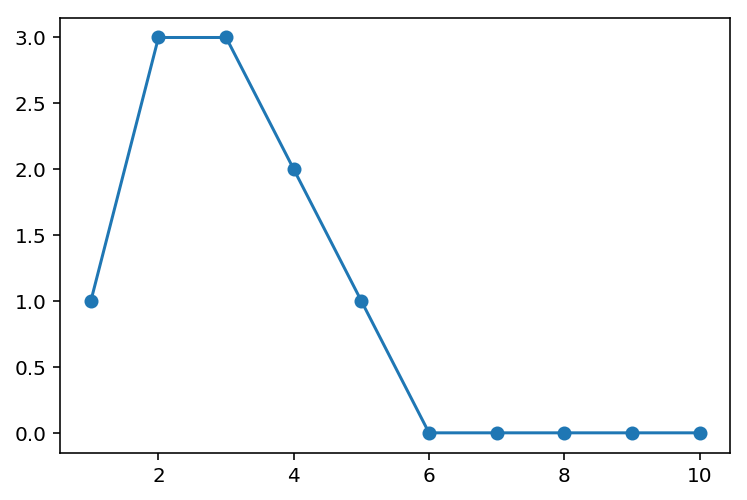

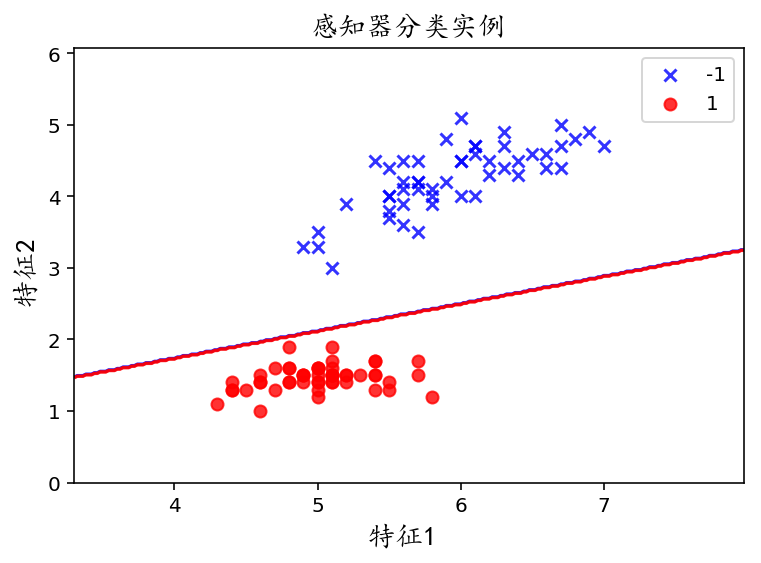

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import Perceptron as per
from matplotlib.colors import ListedColormap
from matplotlib.font_manager import FontProperties
font=FontProperties(fname=r'C:\Windows\Fonts\simkai.ttf',size=14)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'



#读取待分类数据，取第一，三特征进行分类
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
dfy=df.iloc[0:100,4].values
X=df.iloc[0:100,[0,2]].values
#print(X)
y=np.where(dfy=='Iris-setosa',1,-1)
#plt.scatter(X[:50, 0], X[:50, 1],color='red', marker='o', label='setosa')
#plt.scatter(X[50:100, 0], X[50:100, 1],color='blue', marker='x', label='versicolor')
#plt.xlabel('sepal length')
#plt.ylabel('petal length')
#plt.legend(loc='upper left')
#plt.show()
#训练感知器
ppn=per.Perceptron(eta=0.1,n_iter=10)
ppn.fit(X,y)


plt.plot(range(1,len(ppn.errors_)+1),ppn.errors_,marker='o')
plt.show()

#定义判决函数图像
def plot_decision_region(X,y,classifer,resolution=0.02):
   
    
    
    #找出各个样本的最值，分界面由权重决定，对x1,x2进行放缩并不会影响分界面，但可以使分界面更美观
    x1_min,x2_min=X[:,0].min()-1,X[:,1].min()-1
    x1_max,x2_max=X[:,0].max()+1,X[:,1].max()+1
    #print(x1_min)
    #将向量矩阵变为坐标矩阵
    xx1,xx2=np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    #print(xx1)
    #Z是分界决策面所对应的分类决策，+1，-1将其对应于 contourf的等高线绘制高度，进而进行填充，画出分界区域
    Z=classifer.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    #高度需要与contourf(x,y,z)的维度相对应
    Z=Z.reshape(xx1.shape)
    #print(xx1.shape)
    #print(Z)
    
    colors = ('blue', 'red', 'lightgreen', 'gray', 'cyan')
    #colors[:len(np.unique(y))]对应于不同类所要选择的颜色，二分类问题会在red,blue内进行选择
    cmap = ListedColormap(colors[:len(np.unique(y))])
    #其中的alpha参数设置颜色填充的透明度
    #plt.contourf(xx1, xx2, Z, alpha=0.5, cmap=cmap)
    plt.contour(xx1, xx2, Z, alpha=0.5, cmap=cmap)
    #设定所画图形界面
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    
    markers = ('x', 'o', 's', '^', 'v')
    
    for idx, cl in enumerate(np.unique(y)):
        #用y==1和y==-1来做索引
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
        alpha=0.8, c=cmap(idx),
        marker=markers[idx], label=cl)

    
plot_decision_region(X, y, classifer=ppn)
plt.xlabel('特征1 ',fontproperties=font)
plt.ylabel('特征2 ',fontproperties=font)
plt.legend(loc='upper right')
plt.title('感知器分类实例',fontproperties=font)
plt.show()
#plt.savefig(r'E:\Repository\algorithms\tt.jpg',dpi=600)



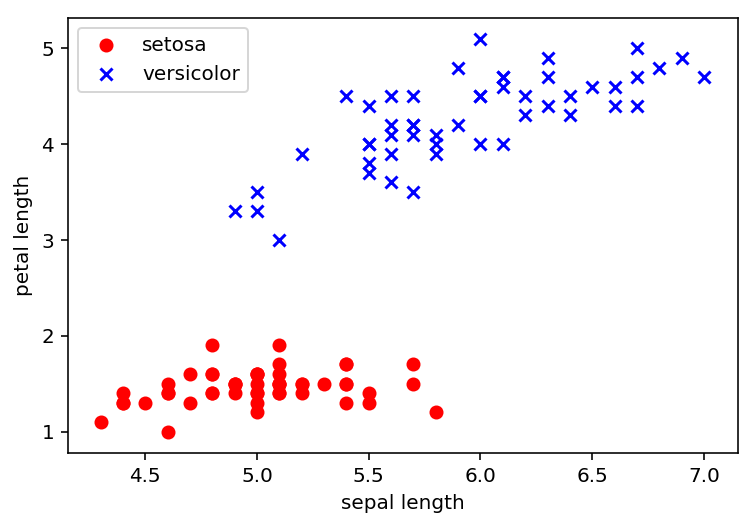

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import Perceptron as per
from matplotlib.colors import ListedColormap
from matplotlib.font_manager import FontProperties
font=FontProperties(fname=r'C:\Windows\Fonts\simkai.ttf',size=14)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'



#读取待分类数据，取第一，三特征进行分类
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
dfy=df.iloc[0:100,4].values
X=df.iloc[0:100,[0,2]].values
#print(X)
y=np.where(dfy=='Iris-setosa',1,-1)
plt.scatter(X[:50, 0], X[:50, 1],color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')
#plt.show()
plt.savefig(r'C:\Users\Administrator\Desktop\工作报告\flowersample.png',dpi=600)
#训练感知器